In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = symbols('t', real=True)
    return (integrate(f*conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

# Function to Approximate

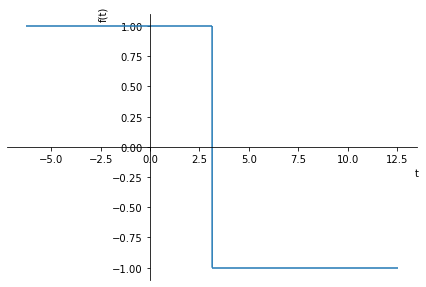

In [2]:
t = symbols('t', real=True)
f1 = Piecewise(
    (1, t < pi),   # t is zero before time pi
    (-1, True)    # otherwise, t is 1
)
plot(f1, (t, -2*pi, 4*pi))

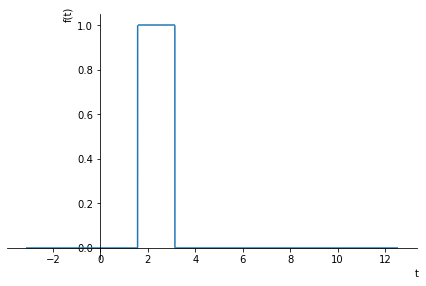

In [3]:
f2 = Piecewise(
    (0, t < pi/2),   # t is zero before time pi
    (1, t < pi),      # otherwise, t is 1
    (0, True)      # otherwise, t is 1
)
plot(f2, (t, -pi, 4*pi))

In [4]:
f = f1 # choose function to evaluate

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [5]:
k = symbols('k', real=True, integer=True)
psi_k = exp(-I*k*t)
tau = 2*pi

ak = L2_coefficient(f, psi_k, tau)

In [6]:
# this is just a fancy way to make sympy print the left hand side of the equation "a_k = "
# otherwise if will just print the right hand side

Eq(symbols('\psi_k'), psi_k)

Eq(\psi_k, exp(-I*k*t))

In [7]:
Eq(symbols('a_k'), ak)

Eq(a_k, Piecewise((I*(1 - (-1)**k)/(pi*k), Ne(k, 0)), (0, True)))

$approx = a_0*\psi_0 + a_1*\psi_1 + a_{-1}*\psi_{-1} + \ldots$

In [8]:
n = 5  # onto basis functions psi_{-10} ... psi_{10}
start = -2*pi
stop = 4*pi

approx = 0
for k_i in range(-n, n+1):
    approx += (ak*psi_k).subs(k, k_i)

Eq(symbols('approx'), approx)

Eq(approx, -2*I*exp(5*I*t)/(5*pi) - 2*I*exp(3*I*t)/(3*pi) - 2*I*exp(I*t)/pi + 2*I*exp(-I*t)/pi + 2*I*exp(-3*I*t)/(3*pi) + 2*I*exp(-5*I*t)/(5*pi))

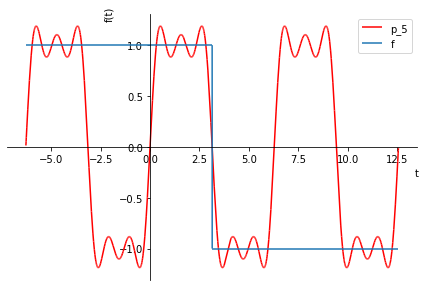

In [9]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

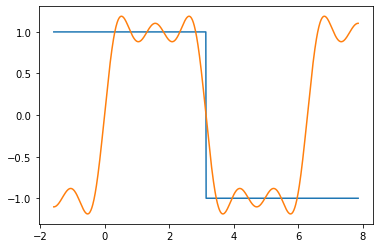

In [10]:
def do_plot():
    # how to convert symbolic functions into numerical functions
    f_func = lambdify(t, f)
    approx_func = lambdify(t, approx)
    
    # generate data
    t_vals = np.linspace(-0.5*np.pi, 2.5*np.pi, 1000)
    f_vals = f_func(t_vals)
    
    approx_vals =  np.real(approx_func(t_vals))
    plt.plot(t_vals, f_vals)
    plt.plot(t_vals, approx_vals)
    
    
    #plt.plot(0*tau, 0.5, 'ro')
    #plt.plot(tau, 0.5, 'ro')

do_plot()

In [11]:
approx

-2*I*exp(5*I*t)/(5*pi) - 2*I*exp(3*I*t)/(3*pi) - 2*I*exp(I*t)/pi + 2*I*exp(-I*t)/pi + 2*I*exp(-3*I*t)/(3*pi) + 2*I*exp(-5*I*t)/(5*pi)

In [12]:
approx.expand(complex=True)

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi)

# Power Spectrum

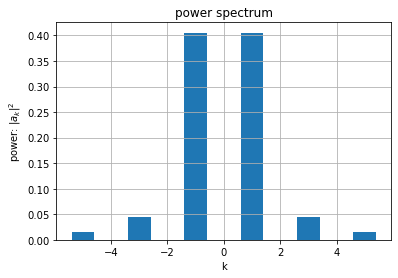

In [13]:
# there isn't a great way to do scatter plots in sympy, so we will plot our 
# power spectrum using the matplotlib library, imported at the top of this
# notebook
k_values = range(-n, n+1)
power = abs(ak)**2

# this is building a list of power values evaluating the function
# using list comprehension, a short way to write for loops
# https://www.programiz.com/python-programming/list-comprehension
power_values = [ power.subs(k, ki) for ki in k_values]
plt.bar(k_values, power_values)
plt.xlabel('k')
plt.ylabel('power: $|a_k|^2$')
plt.title('power spectrum')
plt.grid()

<BarContainer object of 11 artists>

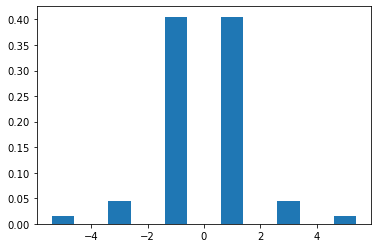

In [14]:
plt.bar(k_values, power_values)


# Using $\{1, \cos(2\pi k t/\tau), \sin(2\pi k t/\tau\}$ as Basis

In [15]:
psi_1k = cos(k*t*2*pi/tau)
Eq(symbols('\psi_1k'), psi_1k)

Eq(\psi_1k, cos(k*t))

In [16]:
alpha_k = L2_coefficient(f, psi_1k, tau)
Eq(symbols('alpha_k'), alpha_k)

Eq(alpha_k, 0)

In [17]:
psi_2k = sin(k*t*2*pi/tau)
Eq(symbols('\psi_2k'), psi_2k)

Eq(\psi_2k, sin(k*t))

In [18]:
beta_k = L2_coefficient(f, psi_2k, tau)
Eq(symbols('beta_k'), beta_k)

Eq(beta_k, Piecewise((2*(1 - (-1)**k)/(pi*k), Ne(k, 0)), (nan, True)))

In [19]:
psi_1 = 1
a_0 = L2_coefficient(f, psi_1, tau)
Eq(symbols('a_0'), a_0)

Eq(a_0, 0)

In [20]:
approx = a_0
for k_i in range(1, n+1):
    approx += (alpha_k*psi_1k + beta_k*psi_2k).subs(k, k_i)
    print(approx)

4*sin(t)/pi
4*sin(t)/pi
4*sin(t)/pi + 4*sin(3*t)/(3*pi)
4*sin(t)/pi + 4*sin(3*t)/(3*pi)
4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi)


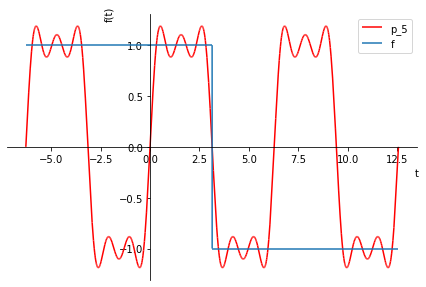

In [21]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

In [22]:
approx

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi)